In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split , KFold 
from sklearn.metrics import mean_squared_error , mean_absolute_error
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
import tqdm 

In [245]:
df = pd.read_csv("../csvs/Gold/gld_price_data.csv")

In [246]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [248]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: xlabel='SPX', ylabel='EUR/USD'>

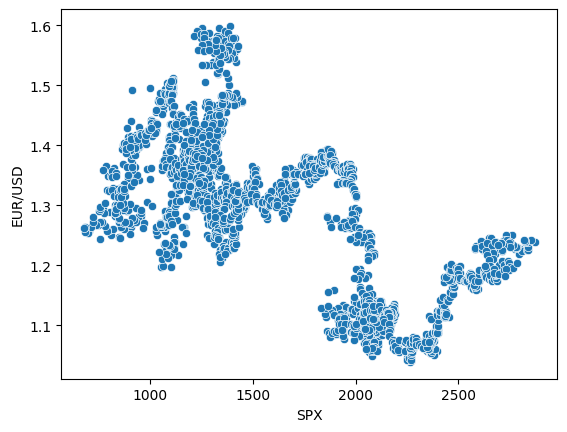

In [249]:
sns.scatterplot(data = df , x = "SPX" , y = "EUR/USD")

In [250]:
#sns.pairplot(data = df , hue = "EUR/USD")

<Axes: xlabel='GLD', ylabel='EUR/USD'>

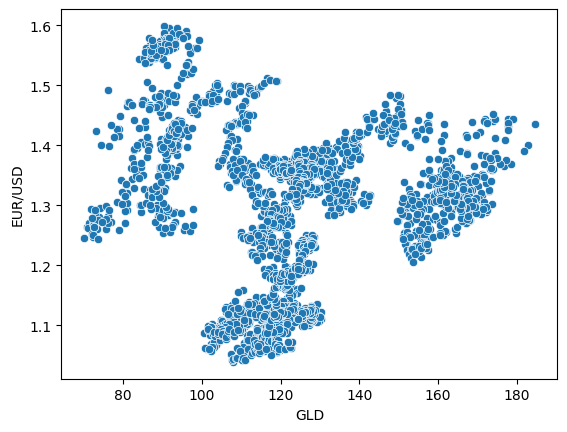

In [251]:
sns.scatterplot(data = df , x = "GLD" , y = "EUR/USD")

<Axes: xlabel='USO', ylabel='EUR/USD'>

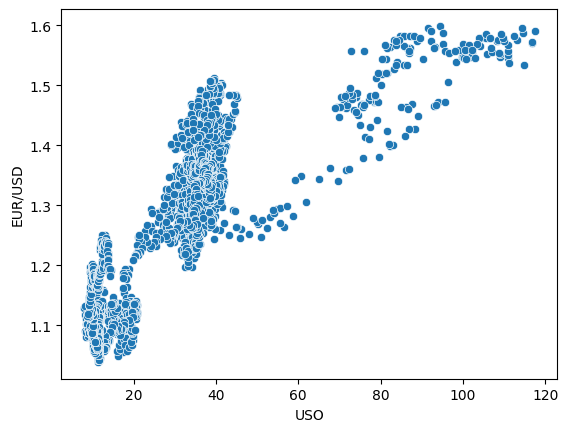

In [252]:
sns.scatterplot(data = df , x = "USO" , y = "EUR/USD")

<Axes: xlabel='SLV', ylabel='EUR/USD'>

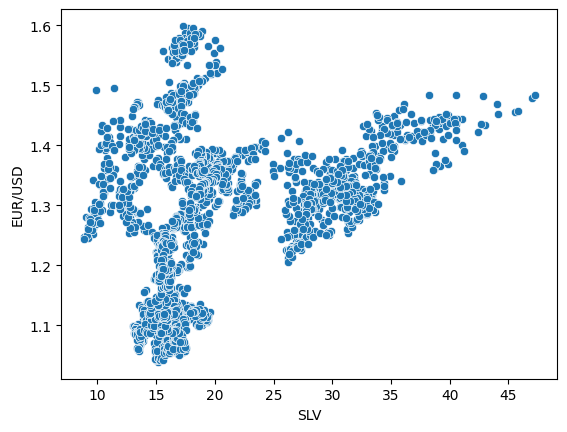

In [253]:
sns.scatterplot(data = df , x = "SLV" , y = "EUR/USD")

In [254]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [255]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [256]:
df.corr(numeric_only=True)

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [257]:
df["Price_per_SLV"] = df["EUR/USD"] + df["SLV"]
df["Price_per_USO"] = df["EUR/USD"] + df["USO"]
df["NEG_Price_per_SPX"] = df["EUR/USD"] + df["SPX"]

In [258]:
df["Date"] = pd.to_datetime(df["Date"])
df["Value_on_Year"] = df["Date"].dt.year
df["Value_on_Month"] = df["Date"].dt.month
df["Month"] = df["Date"].dt.month_name()
df = df.drop(["Date"], axis = 1)

In [259]:
X = pd.get_dummies(df.drop(["EUR/USD"] , axis = 1)).values
print(X.shape)
X.astype(np.float64)

(2290, 21)


array([[1447.160034,   84.860001,   78.470001, ...,    0.      ,
           0.      ,    0.      ],
       [1447.160034,   85.57    ,   78.370003, ...,    0.      ,
           0.      ,    0.      ],
       [1411.630005,   85.129997,   77.309998, ...,    0.      ,
           0.      ,    0.      ],
       ...,
       [2723.070068,  125.18    ,   14.41    , ...,    0.      ,
           0.      ,    0.      ],
       [2730.129883,  124.489998,   14.38    , ...,    0.      ,
           0.      ,    0.      ],
       [2725.780029,  122.5438  ,   14.4058  , ...,    0.      ,
           0.      ,    0.      ]])

In [260]:
y = df["EUR/USD"].values.reshape(-1,1)
print(y.shape)
y

(2290, 1)


array([[1.471692],
       [1.474491],
       [1.475492],
       ...,
       [1.191753],
       [1.193118],
       [1.182033]])

In [261]:
le = LabelEncoder()
y = le.fit_transform(y)

g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [262]:
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size = 0.2,
                                                       train_size= 0.8 ,
                                                       shuffle=True)

In [263]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [264]:
print("Maximalwert von X_train:", X_train.max())
print("Maximalwert von X_test:", X_test.max())
print("Minimalwert von X_train:", X_train.min())
print("nMinimalwert von X_test:", X_test.min())

print("\n")

print("Maximalwert von y_train:", y_train.max())
print("Minimalwert von y_train:", y_train.min())
print("nMaximalwert von y_test:", y_test.max())
print("Minimalwert von y_test:", y_test.min())

Maximalwert von X_train: 1.0
Maximalwert von X_test: 1.024863590463529
Minimalwert von X_train: 0.0
nMinimalwert von X_test: -0.0027484379658914704


Maximalwert von y_train: 2064
Minimalwert von y_train: 0
nMaximalwert von y_test: 2065
Minimalwert von y_test: 7


In [265]:
print(type(X_train))
print(type(X_test))
print(type(y_test))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [266]:
X_train = T.from_numpy(X_train).float()
X_test = T.from_numpy(X_test).float()
y_test = T.from_numpy(y_test).float()
y_train = T.from_numpy(y_train).float()

In [267]:
print(type(X_train))
print(type(X_test))
print(type(y_test))
print(type(y_train))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [268]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

torch.Size([1832, 21])
torch.Size([458, 21])
torch.Size([458])
torch.Size([1832])


In [269]:
class Gold_Price_AI(nn.Module):
    
    def __init__(self, input_dims = 21, hidden_units  = 125, output_dims = 1):
        super().__init__()
        self.droprate = (0.2)
        self.dropout = nn.Dropout(p = self.droprate)
        self.activation = nn.LeakyReLU()
        
        self.ll1 = nn.Linear(in_features= input_dims , out_features=  hidden_units)
        self.ll2 = nn.Linear(in_features= hidden_units , out_features= hidden_units)
        
        self.ll3 = nn.Linear(in_features= hidden_units , out_features=  hidden_units)
        self.ll4 = nn.Linear(in_features= hidden_units , out_features=  output_dims)
        
    def forward(self , X):
        
        X = self.activation(self.ll1(X))
        X = self.activation(self.ll2(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll3(X))
        X = self.activation(self.ll4(X))
        X = self.dropout(X)
        
        return X
    
class training_and_testing():
    
    def __init__(self):
        
        self.device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
        self.loss = nn.MSELoss()
        self.model = Gold_Price_AI().to(self.device)
        self.lr = 1e-3
        self.criterion = opt.Adam(self.model.parameters() , lr = self.lr)
        self.epochs = 20
        
        self.batch_size = 32
        self.performance = []
        
        self.X_train = X_train
        self.X_test = X_test
        self.y_test = y_test
        self.y_train = y_train
        
    def train_loop(self):
        
        MAE , MSE = 0.0 , 0.0
        
        for i in range(self.epochs):
            with tqdm.tqdm(range(0, len(self.X_train), self.batch_size), unit= "batch" , mininterval= 0 , disable=True ) as progress:
                progress.set_description(f"On Epoch : {i + 1} / {self.epochs}")
                for start in progress:
                    self.model.train()
                    end = start + self.batch_size
                    X_batch = X_train[start : end]
                    y_batch = y_train[start : end]
                    f_pass = self.model(X_batch)
                    
                    loss = self.loss(f_pass , y_batch)
                    self.criterion.zero_grad()
                    loss.backward()
                    self.criterion.step()
                    
                    progress.set_postfix(mse = float(loss) , mae = float(loss))
                    self.model.eval()
                    with T.no_grad():
                        
                        f_pass_eval = self.model(X_batch)
                        mae = T.mean(T.abs(f_pass_eval.detach().cpu() - y_batch)).item()
                        MAE += mae * X_batch.size(dim = 0)

                        mse = T.mean(T.abs(f_pass_eval.detach().cpu() - y_batch) ** 2).item()
                        MSE += mse * X_batch.size(dim = 0)
                    
        MAE /= len(self.X_train)
        MSE /= len(self.X_train)
        
        print(f"Epoch {i + 1}/{self.epochs} - MAE: {MAE:.2f}, MSE: {MSE:.2f}")
        self.performance.append(MAE)
        plt.xlabel('Epochs')
        plt.ylabel('MSE')
        plt.title('Model Performance Over Epochs')
        plt.plot(MAE)
        plt.show()
    
    def parameters(self):
        return self.model.state_dict()

g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 20/20 - MAE: 11278.95, MSE: 9096149.70


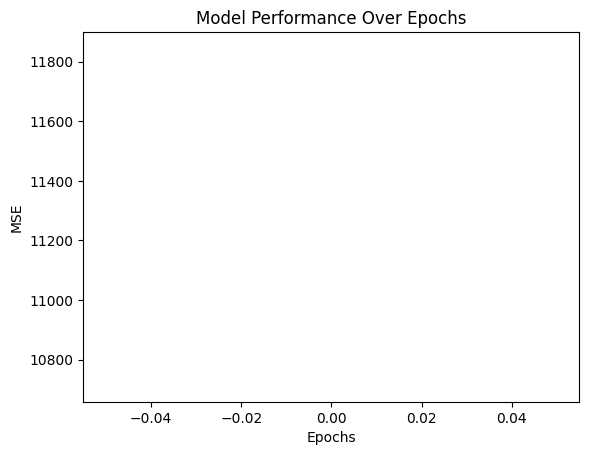

In [270]:
training_and_testing().train_loop()